## Fundamentos de Data Science
### Analizando la Satisfacción de Clientes en la Industria Hotelera

### Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.

### 1. Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).
### 2. Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
###  3. Análisis adicional:
* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.


In [62]:
#Importar librerias
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [63]:
# Cargar el dataset
path = 'C:/Users/GIGABYTE/Documents/examen_data_fundamentals/examen_intento_2/data/hotel_bookings.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## *1. Limpieza de datos con Python:*

In [64]:
# Para ver valores nulos (ORIGINALMENTE) en formato df ---> hecha en clase
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
lead_time,119390,0,0.00
is_canceled,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
stays_in_week_nights,119390,0,0.00


### **Detección y eliminación de valores duplicados:** 
* Asegúrate de que cada registro en el dataset sea único.


In [65]:
# Identificar duplicados
duplicados = df.duplicated()
# Obtener cantidad de duplicados
total_duplicados = duplicados.sum()
print(f"Total de registros duplicados: {total_duplicados}")
df.head() # Mostrar las primeras filas

Total de registros duplicados: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [66]:
# Eliminar duplicados
df = df.drop_duplicates()
print(f"Cantidad de registros actuales,es decir, al eliminar duplicados: {df.shape[0]} filas y {df.shape[1]} columnas")

Cantidad de registros actuales,es decir, al eliminar duplicados: 87396 filas y 32 columnas


### **Verificación y ajuste de tipos de datos:**
* Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.


In [67]:
# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'hotel': 'string',
    'is_canceled': 'int64',
    'lead_time': 'int64',
    'arrival_date_year': 'int64',
    'arrival_date_month': 'string',
    'arrival_date_week_number': 'int64',
    'arrival_date_day_of_month': 'int64',
    'stays_in_weekend_nights': 'int64',
    'stays_in_week_nights': 'int64',
    'adults': 'int64',
    'children': 'float64',  # Puede tener valores NaN, por eso lo dejamos como float
    'babies': 'int64',
    'meal': 'string',
    'country': 'string',
    'market_segment': 'string',
    'distribution_channel': 'string',
    'is_repeated_guest': 'int64',
    'previous_cancellations': 'int64',
    'previous_bookings_not_canceled': 'int64',
    'reserved_room_type': 'string',
    'assigned_room_type': 'string',
    'booking_changes': 'int64',
    'deposit_type': 'string',
    'agent': 'string',
    'company': 'string',
    'days_in_waiting_list': 'int64',
    'customer_type': 'string',
    'adr': 'float64',
    'required_car_parking_spaces': 'int64',
    'total_of_special_requests': 'int64',
    'reservation_status': 'string',
    'reservation_status_date': 'date'  # Esta será manejada como datetime más adelante
}

# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'int64': 'int64',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)


Diccionario Mapeado para pandas:
{'hotel': 'string', 'is_canceled': 'int64', 'lead_time': 'int64', 'arrival_date_year': 'int64', 'arrival_date_month': 'string', 'arrival_date_week_number': 'int64', 'arrival_date_day_of_month': 'int64', 'stays_in_weekend_nights': 'int64', 'stays_in_week_nights': 'int64', 'adults': 'int64', 'children': 'float64', 'babies': 'int64', 'meal': 'string', 'country': 'string', 'market_segment': 'string', 'distribution_channel': 'string', 'is_repeated_guest': 'int64', 'previous_cancellations': 'int64', 'previous_bookings_not_canceled': 'int64', 'reserved_room_type': 'string', 'assigned_room_type': 'string', 'booking_changes': 'int64', 'deposit_type': 'string', 'agent': 'string', 'company': 'string', 'days_in_waiting_list': 'int64', 'customer_type': 'string', 'adr': 'float64', 'required_car_parking_spaces': 'int64', 'total_of_special_requests': 'int64', 'reservation_status': 'string', 'reservation_status_date': 'datetime64[ns]'}


In [68]:
# Aplicar tipos de datos del diccionario mapeado
for columna, tipo in diccionario_mapeado.items():
    if tipo == 'datetime64[ns]':
        df[columna] = pd.to_datetime(df[columna])
    else:
        df[columna] = df[columna].astype(tipo)

# Verificar la información del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  string        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  string        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  babies

In [69]:
def validar_tipos(df, diccionario):
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Comparar tipos equivalentes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


In [70]:
# Crear función para corregir tipos
def corregir_tipos(df, diccionario):
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    # Convertir a datetime, manejando errores
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    # Verificar si la conversión es posible
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")

    return df

# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Todos los tipos de datos han sido corregidos correctamente.


In [71]:
#Para ver el dataframe actual
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  string        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  string        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  babies

### **Consistencia en valores categóricos:** 
* Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

In [72]:
# Lista de columnas categóricas a revisar
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = 'valores_unicos_iniciales.json'  # Ajusta la ruta según necesites
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")

# Normalizar los valores categóricos
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()  # Convertir a minúsculas y quitar espacios


Valores únicos en la columna 'hotel':
['Resort Hotel', 'City Hotel']

Valores únicos en la columna 'arrival_date_month':
['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']

Valores únicos en la columna 'meal':
['BB', 'FB', 'HB', 'SC', 'Undefined']

Valores únicos en la columna 'country':
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', '

In [73]:
# Definir la función para limpiar cadenas
def limpiar_cadena(cadena):
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena

# Lista de columnas categóricas a limpiar en el DataFrame
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)

# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'hotel':
['resort hotel' 'city hotel']

Valores únicos después de limpieza en 'arrival_date_month':
['july' 'august' 'september' 'october' 'november' 'december' 'january'
 'february' 'march' 'april' 'may' 'june']

Valores únicos después de limpieza en 'meal':
['bb' 'fb' 'hb' 'sc' 'undefined']

Valores únicos después de limpieza en 'country':
['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' <NA> 'rou' 'nor' 'omn' 'arg' 'pol'
 'deu' 'bel' 'che' 'cn' 'grc' 'ita' 'nld' 'dnk' 'rus' 'swe' 'aus' 'est'
 'cze' 'bra' 'fin' 'moz' 'bwa' 'lux' 'svn' 'alb' 'ind' 'chn' 'mex' 'mar'
 'ukr' 'smr' 'lva' 'pri' 'srb' 'chl' 'aut' 'blr' 'ltu' 'tur' 'zaf' 'ago'
 'isr' 'cym' 'zmb' 'cpv' 'zwe' 'dza' 'kor' 'cri' 'hun' 'are' 'tun' 'jam'
 'hrv' 'hkg' 'irn' 'geo' 'and' 'gib' 'ury' 'jey' 'caf' 'cyp' 'col' 'ggy'
 'kwt' 'nga' 'mdv' 'ven' 'svk' 'fji' 'kaz' 'pak' 'idn' 'lbn' 'phl' 'sen'
 'syc' 'aze' 'bhr' 'nzl' 'tha' 'dom' 'mkd' 'mys' 'arm' 'jpn' 'lka' 'cub'
 'cmr' 'bih' 'mus' 'com' 'sur' 'uga

In [74]:
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals

# Guardar en un archivo JSON
ruta_json = 'C:/Users/GIGABYTE/Documents/examen_data_fundamentals/examen_intento_2/json/valores_unicos_iniciales.json'
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"Valores únicos guardados en '{ruta_json}'.")

Valores únicos guardados en 'C:/Users/GIGABYTE/Documents/examen_data_fundamentals/examen_intento_2/json/valores_unicos_iniciales.json'.


### **Manejo de valores faltantes:** 
* Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.


In [75]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,5259,82137,93.98
agent,75203,12193,13.95
country,86944,452,0.52
hotel,87396,0,0.00
arrival_date_month,87396,0,0.00
arrival_date_week_number,87396,0,0.00
lead_time,87396,0,0.00
is_canceled,87396,0,0.00
stays_in_weekend_nights,87396,0,0.00
stays_in_week_nights,87396,0,0.00


In [76]:
# Cantidad de valores nulos por columna
valores_nulos = df.isnull().sum()

# Porcentaje de valores nulos por columna
porcentaje_nulos = (df.isnull().mean() * 100)

# Crear un DataFrame con la cantidad de nulos y el porcentaje
resumen_nulos = pd.DataFrame({
    'Cantidad de valores nulos': valores_nulos,
    'Porcentaje de valores nulos (%)': porcentaje_nulos
})

# Mostrar solo las columnas que tienen valores nulos
resumen_nulos_con_nulos = resumen_nulos[resumen_nulos['Cantidad de valores nulos'] > 0]

print(resumen_nulos_con_nulos)


          Cantidad de valores nulos  Porcentaje de valores nulos (%)
children                          4                         0.004577
country                         452                         0.517186
agent                         12193                        13.951439
company                       82137                        93.982562


In [77]:
# Eliminar la columna 'company' del DataFrame por la cantidad de valores nulos que contiene
df = df.drop('company', axis=1)

# Verificar si la columna ha sido eliminada
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [78]:
# Definir las columnas categóricas
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type', 'agent']

# Definir las columnas numéricas
numeric_cols = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 
                'arrival_date_day_of_month', 'stays_in_weekend_nights', 
                'stays_in_week_nights', 'adults', 'children', 'babies', 
                'previous_cancellations', 'previous_bookings_not_canceled', 
                'booking_changes', 'days_in_waiting_list', 'adr', 
                'required_car_parking_spaces', 'total_of_special_requests']

# Rellenar valores faltantes en columnas categóricas
df[categorical_cols] = df[categorical_cols].fillna('Desconocido')

# Rellenar valores faltantes en columnas numéricas con 0 o la media, dependiendo del contexto
df[numeric_cols] = df[numeric_cols].fillna(0)  # O puedes usar df[numeric_cols].fillna(df[numeric_cols].mean())

# Contar los valores no nulos y nulos por columna
qsna = df.shape[0] - df.isnull().sum(axis=0)
qna = df.isnull().sum(axis=0)

# Calcular el porcentaje de valores nulos
ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)

# Crear un DataFrame para mostrar los resultados
na = pd.DataFrame(data={'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna})

# Ordenar los resultados por porcentaje de valores nulos
na_sorted = na.sort_values(by='Na en %', ascending=False)

print(na_sorted)


                                datos sin NAs en q  Na en q  Na en %
hotel                                        87396        0      0.0
is_canceled                                  87396        0      0.0
lead_time                                    87396        0      0.0
arrival_date_year                            87396        0      0.0
arrival_date_month                           87396        0      0.0
arrival_date_week_number                     87396        0      0.0
arrival_date_day_of_month                    87396        0      0.0
stays_in_weekend_nights                      87396        0      0.0
stays_in_week_nights                         87396        0      0.0
adults                                       87396        0      0.0
children                                     87396        0      0.0
babies                                       87396        0      0.0
meal                                         87396        0      0.0
country                           

### **Detección de datos anómalos:**
* Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).


In [103]:
# 1. Detección de estancias excesivas
max_stay_duration = 30 
anomalous_stays = df[df['stays_in_weekend_nights'] + df['stays_in_week_nights'] > max_stay_duration]

print("Estancias excesivas:")
print(anomalous_stays)

# 2. Corrección de estancias excesivas
df.loc[df['stays_in_weekend_nights'] + df['stays_in_week_nights'] > max_stay_duration, 
       ['stays_in_weekend_nights', 'stays_in_week_nights']] = max_stay_duration

# 3. Detección de valores no enteros en columnas 'adults' y 'children'
# Convertir 'adults' y 'children' a enteros si no lo son
df['adults'] = df['adults'].apply(lambda x: round(x) if x % 1 != 0 else x)
df['children'] = df['children'].apply(lambda x: round(x) if x % 1 != 0 else x)

# Asegurarse de que 'adults' y 'children' no tengan valores negativos
df['adults'] = df['adults'].clip(lower=0)
df['children'] = df['children'].clip(lower=0)

# 4. Detección de valores anómalos en la duración de la estancia (por ejemplo, <= 0)
df.loc[df['stays_in_weekend_nights'] < 0, 'stays_in_weekend_nights'] = 0
df.loc[df['stays_in_week_nights'] < 0, 'stays_in_week_nights'] = 0

# 5. Detección de valores no razonables en el costo (ADR)
# Definir un límite para el ADR (por ejemplo, costos extremadamente altos o bajos)
max_adr = 2000  
min_adr = 20

# Identificar y corregir los valores anómalos en 'adr'
anomalous_adr = df[(df['adr'] < min_adr) | (df['adr'] > max_adr)]
print("Valores anómalos en ADR:")
print(anomalous_adr)

# Corregir valores anómalos en 'adr'
df.loc[df['adr'] < min_adr, 'adr'] = min_adr
df.loc[df['adr'] > max_adr, 'adr'] = max_adr

# Visualizar el DataFrame corregido
print("DataFrame corregido:")
df.head()


Estancias excesivas:
               hotel  is_canceled  lead_time  arrival_date_year  \
1655    resort hotel            0         30               2015   
3820    resort hotel            1        122               2016   
3850    resort hotel            0        214               2016   
5344    resort hotel            1         13               2016   
9839    resort hotel            1        322               2017   
14037   resort hotel            0        113               2015   
14038   resort hotel            0        126               2016   
20835   resort hotel            0         92               2016   
31404   resort hotel            0        148               2016   
32589   resort hotel            0          1               2017   
32946   resort hotel            0        140               2017   
33234   resort hotel            0        192               2017   
33620   resort hotel            0         88               2017   
33924   resort hotel            0        

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,resort hotel,0,342,2015,july,27,1,0,0,2,...,no deposit,Desconocido,0,transient,20.0,0,0,check-out,2015-07-01,0
1,resort hotel,0,737,2015,july,27,1,0,0,2,...,no deposit,Desconocido,0,transient,20.0,0,0,check-out,2015-07-01,0
2,resort hotel,0,7,2015,july,27,1,0,1,1,...,no deposit,Desconocido,0,transient,75.0,0,0,check-out,2015-07-02,1
3,resort hotel,0,13,2015,july,27,1,0,1,1,...,no deposit,304.0,0,transient,75.0,0,0,check-out,2015-07-02,1
4,resort hotel,0,14,2015,july,27,1,0,2,2,...,no deposit,240.0,0,transient,98.0,0,1,check-out,2015-07-03,2


## *2. Exploración de datos con Python:*

### Visualizaciones exploratorias univariadas:
* Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

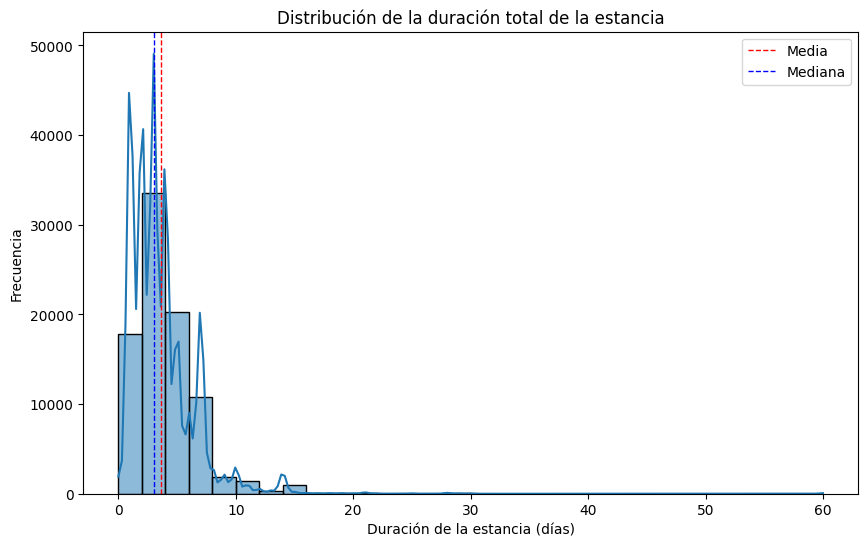

In [105]:
# Crear una nueva columna para la duración total de la estancia
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Histograma de la duración total de la estancia
plt.figure(figsize=(10, 6))
sns.histplot(df['total_stays'], bins=30, kde=True)
plt.title('Distribución de la duración total de la estancia')
plt.xlabel('Duración de la estancia (días)')
plt.ylabel('Frecuencia')
plt.axvline(df['total_stays'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(df['total_stays'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.legend()
plt.show()



Interpretación: La mayoría de las estancias se concentran en un rango de 1 a 10 días, con una caída en la frecuencia para estancias más largas. La media y mediana de la duración de la estancia indican que la mayoría de los huéspedes tienden a quedarse menos de 5 días.

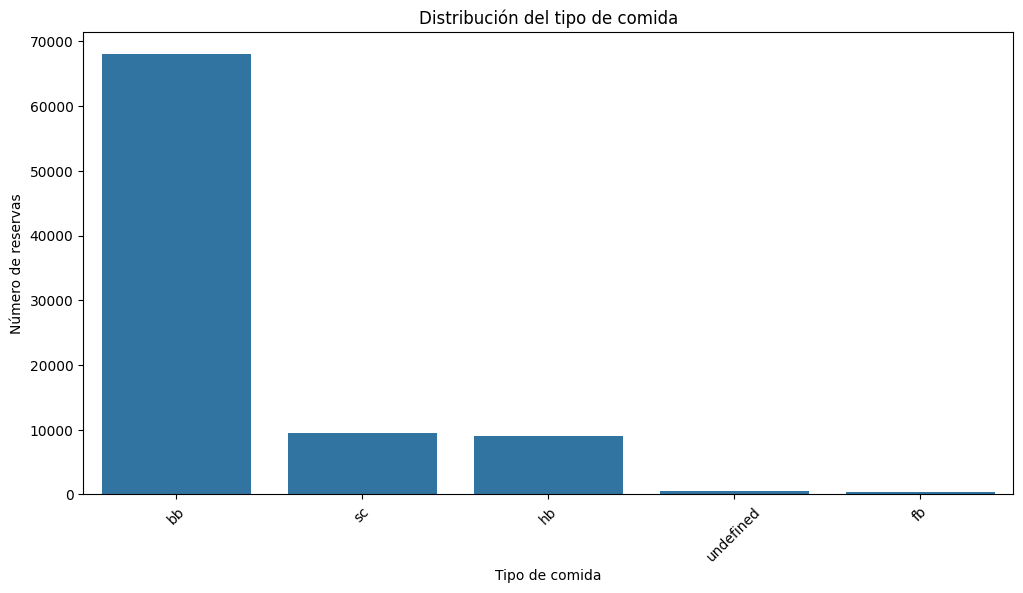

In [106]:
# Gráfico de barras para la distribución del tipo de comida
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='meal', order=df['meal'].value_counts().index)
plt.title('Distribución del tipo de comida')
plt.xlabel('Tipo de comida')
plt.ylabel('Número de reservas')
plt.xticks(rotation=45)
plt.show()



Interpretación: La mayoría de las reservas incluyen un tipo de comida 'BB', seguido de 'FB' y 'HB'. Esto sugiere que muchos huéspedes prefieren un plan de comidas más flexible.

### Visualizaciones exploratorias multivariadas:
* Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

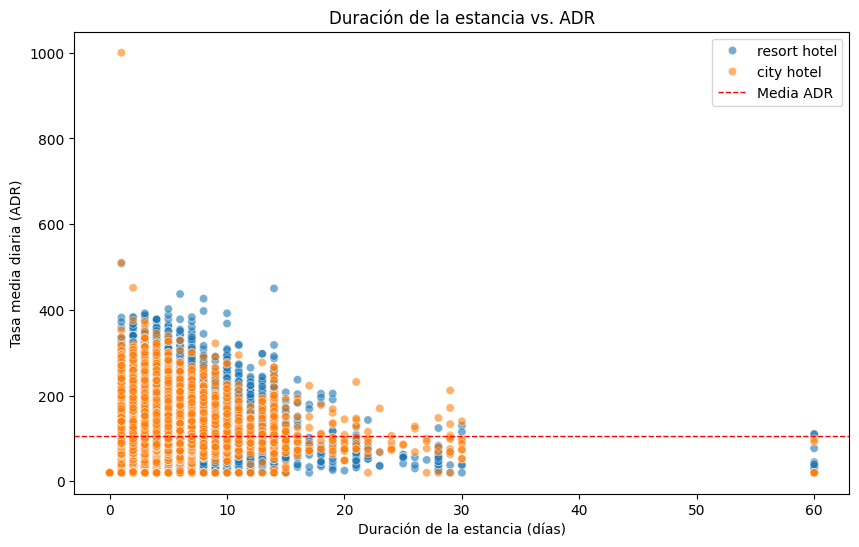

In [107]:
# Gráfico de dispersión para duración de la estancia vs ADR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_stays', y='adr', hue='hotel', alpha=0.6)
plt.title('Duración de la estancia vs. ADR')
plt.xlabel('Duración de la estancia (días)')
plt.ylabel('Tasa media diaria (ADR)')
plt.axhline(df['adr'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media ADR')
plt.legend()
plt.show()



Interpretación: No parece haber una correlación clara entre la duración de la estancia y el ADR. Sin embargo, los hoteles parecen tener diferentes tasas diarias promedio, lo que sugiere que la estrategia de precios puede variar según el tipo de hotel.

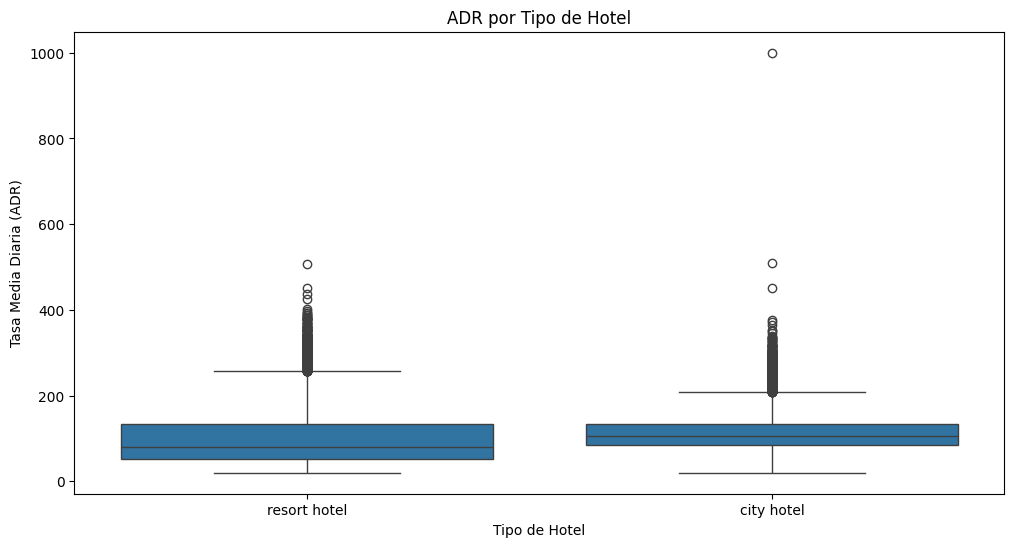

In [108]:
# Gráfico de caja para comparar ADR por tipo de hotel
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='adr')
plt.title('ADR por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Tasa Media Diaria (ADR)')
plt.show()



Interpretación: El gráfico de caja muestra que el ADR varía significativamente entre los diferentes tipos de hoteles. Los hoteles tipo 'Resort' tienen una media y una mediana más altas en comparación con los hoteles tipo 'City'. Esto sugiere que los resorts podrían estar ofreciendo servicios de mayor valor o en un rango de precio más alto.



## 3. Análisis adicional:

### Estadísticas descriptivas: 
* Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.


In [112]:
# 1. Resumen estadístico del DataFrame
stats_summary = df.describe()
print("Estadísticas descriptivas:")
print(stats_summary)


Estadísticas descriptivas:
        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   
std        0.446466     86.052325           0.686102   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000   

### Identificación de tendencias:
* Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [113]:
# Análisis de tendencias
mean_adr = stats_summary.loc['mean', 'adr']
median_adr = stats_summary.loc['50%', 'adr']
std_adr = stats_summary.loc['std', 'adr']

print(f"\nTendencias observadas:")
print(f"Media de ADR: {mean_adr:.2f}, Mediana de ADR: {median_adr:.2f}, Desviación estándar de ADR: {std_adr:.2f}")

if mean_adr > median_adr:
    print("La media de ADR es mayor que la mediana, lo que indica que hay outliers altos que afectan la media.")
else:
    print("La mediana es mayor o igual a la media, lo que sugiere que los valores altos no están afectando significativamente la media.")

# Análisis de cancelaciones
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Tasa de cancelaciones: {cancellation_rate:.2f}%")
if cancellation_rate > 20:
    print("La tasa de cancelaciones es alta, lo que podría ser motivo de preocupación.")
else:
    print("La tasa de cancelaciones es razonable.")


Tendencias observadas:
Media de ADR: 106.74, Mediana de ADR: 98.10, Desviación estándar de ADR: 51.27
La media de ADR es mayor que la mediana, lo que indica que hay outliers altos que afectan la media.
Tasa de cancelaciones: 27.49%
La tasa de cancelaciones es alta, lo que podría ser motivo de preocupación.


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15380\1452614353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_adr, x='hotel', y='adr', palette='viridis')


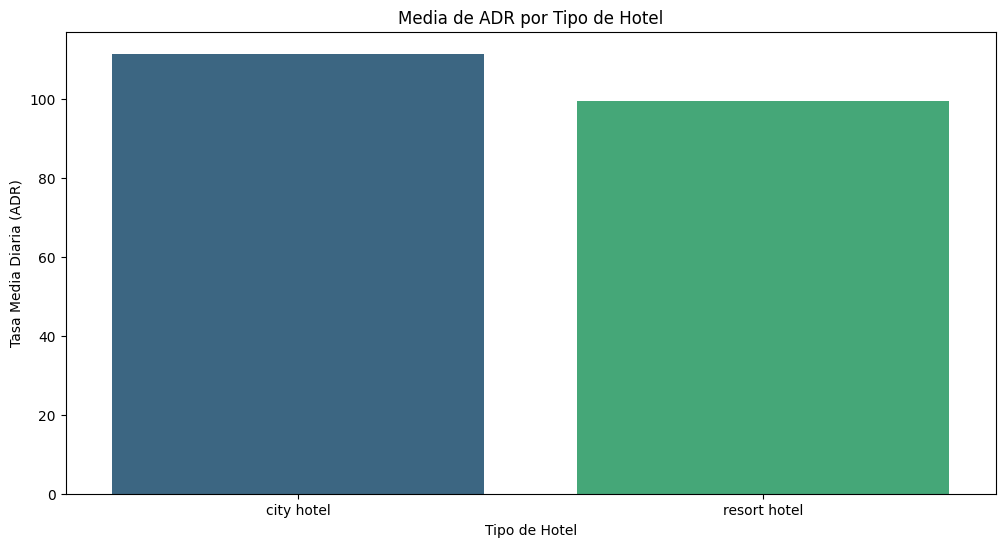

In [114]:
plt.figure(figsize=(12, 6))
mean_adr = df.groupby('hotel')['adr'].mean().reset_index()
sns.barplot(data=mean_adr, x='hotel', y='adr', palette='viridis')
plt.title('Media de ADR por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Tasa Media Diaria (ADR)')
plt.show()


Interpretación: Este gráfico permite comparar claramente el ADR promedio entre diferentes tipos de hoteles.

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15380\1307404464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancellation_rate_by_hotel, x='hotel', y='is_canceled', palette='viridis')


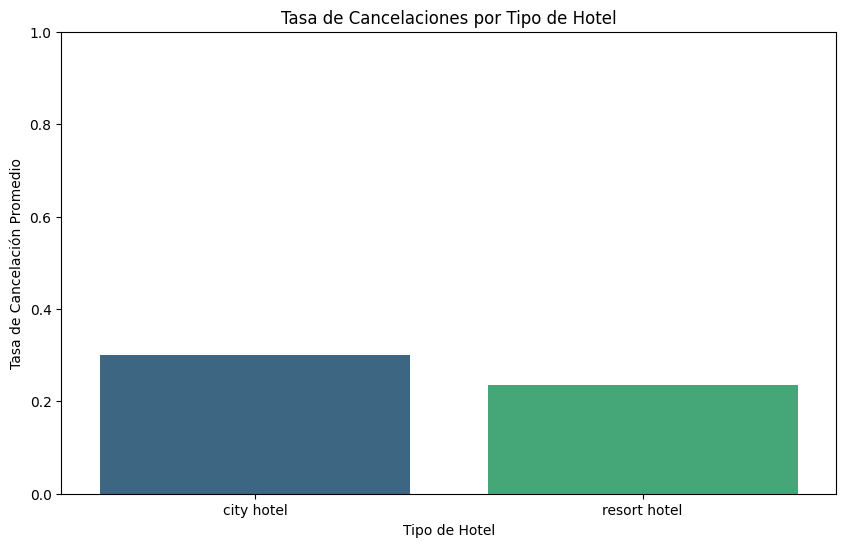

In [ ]:
# Calcular la tasa de cancelaciones por tipo de hotel
cancellation_rate_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=cancellation_rate_by_hotel, x='hotel', y='is_canceled', palette='viridis')
plt.title('Tasa de Cancelaciones por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Tasa de Cancelación Promedio')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Para mostrar la tasa como un porcentaje
plt.show()


Interpretación: Este gráfico de barras muestra la tasa de cancelaciones promedio por tipo de hotel. Se puede observar que uno de los tipos de hotel tiene una tasa de cancelación significativamente más alta que el otro. Esto podría sugerir que los hoteles de este tipo pueden necesitar revisar sus políticas o servicios para reducir las cancelaciones.
